# Numbers, that matter!

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns;

In [3]:
import glob
weekly_dump_directory = 'data/*.csv'
dump_files = glob.glob(weekly_dump_directory)
print('Number of files: {}'.format(len(dump_files)))

Number of files: 31


In [4]:
header = [
    'date',
    'total_changesets',
    'features_created',
    'features_modified',
    'features_deleted',
    'features_total',
    'total_mappers'
]

In [5]:
results = []
for dump_file in dump_files:
    changesets = pd.read_csv(dump_file).drop_duplicates('ID')
    results.append([
        dump_file.split('/')[-1].split('.')[0],
        changesets.shape[0],
        changesets['create'].sum(),
        changesets['modify'].sum(),
        changesets['delete'].sum(),
        changesets[['create', 'modify', 'delete']].sum().sum(),
        changesets.drop_duplicates('user').shape[0]
    ])

In [6]:
numbers = pd.DataFrame(results, columns=header)
numbers['date'] = pd.to_datetime(numbers['date'])
numbers

,date,total_changesets,features_created,features_modified,features_deleted,features_total,total_mappers
0,2017-03-01,26010,1681647.0,478123.0,259388.0,2419158.0,4301
1,2017-03-02,26753,1776011.0,507178.0,204031.0,2487220.0,4654
2,2017-03-03,25009,1597460.0,429499.0,164174.0,2191133.0,4606
3,2017-03-04,22653,1641327.0,374004.0,167132.0,2182463.0,4188
4,2017-03-05,23832,1976036.0,379001.0,222609.0,2577646.0,4333
5,2017-03-06,28113,1900508.0,457403.0,238017.0,2595928.0,4558
6,2017-03-07,28192,1946153.0,479857.0,342066.0,2768076.0,4505
7,2017-03-08,26950,1745724.0,461584.0,345495.0,2552803.0,4478
8,2017-03-09,29302,2016459.0,454194.0,363573.0,2834226.0,5059
9,2017-03-10,26948,1742949.0,639239.0,356426.0,2738614.0,4671


In [7]:
numbers.describe()

,total_changesets,features_created,features_modified,features_deleted,features_total,total_mappers
count,31.000000,3.100000e+01,31.000000,31.000000,3.100000e+01,31.000000
mean,27003.161290,1.818805e+06,510544.032258,242250.193548,2.571599e+06,4457.516129
std,2771.140188,2.011681e+05,120479.539507,82242.113802,2.830400e+05,301.191619
min,21398.000000,1.388743e+06,372235.000000,132794.000000,2.029283e+06,3720.000000
25%,25913.000000,1.719621e+06,441846.500000,184301.000000,2.367374e+06,4317.000000
50%,27412.000000,1.805595e+06,479857.000000,229745.000000,2.595928e+06,4505.000000
75%,28491.500000,1.970790e+06,555849.500000,259630.500000,2.776394e+06,4656.000000
max,33054.000000,2.250073e+06,941816.000000,494808.000000,3.063362e+06,5059.000000


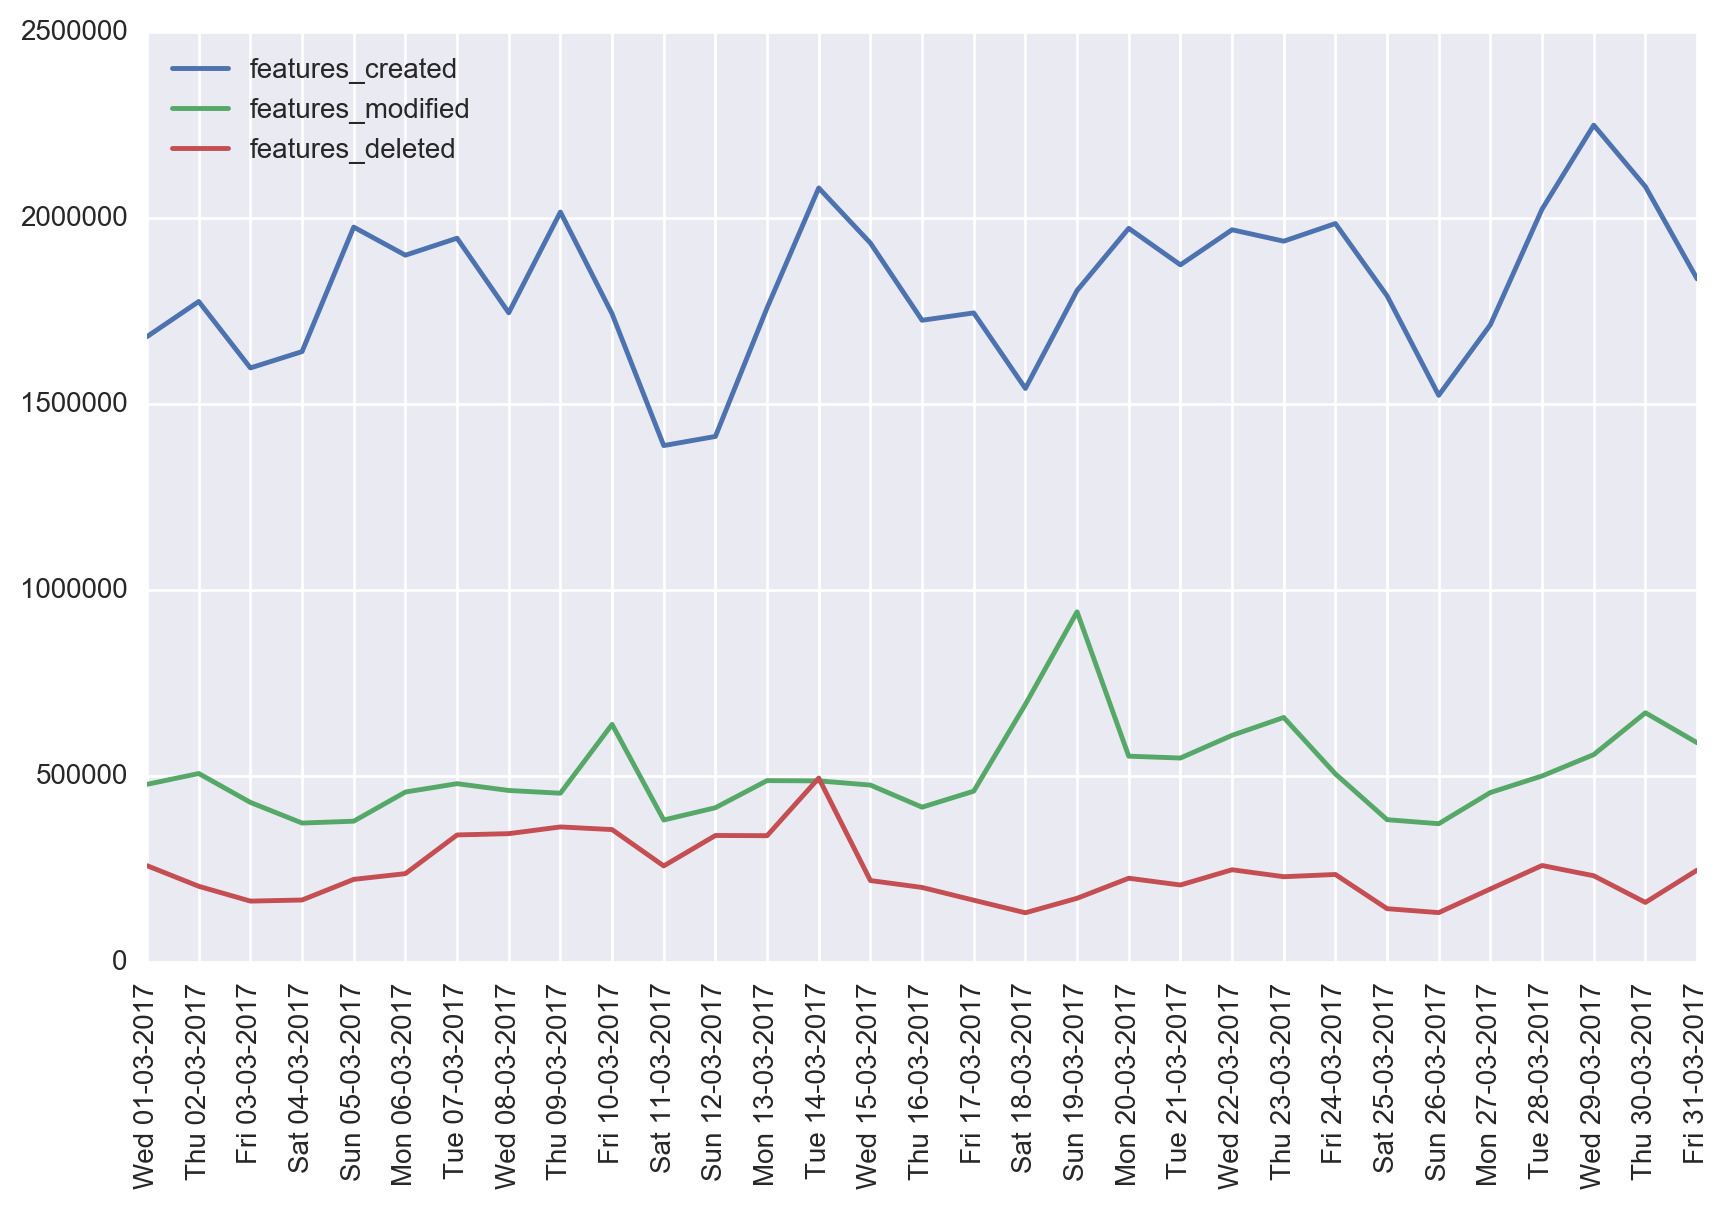

In [8]:
ax = numbers[['features_created', 'features_modified', 'features_deleted']].plot(figsize=(10, 6))
ax.set_xticks(np.arange(numbers['date'].size))
ax.set_xticklabels(numbers['date'].dt.strftime('%a %d-%m-%Y'), rotation=90);

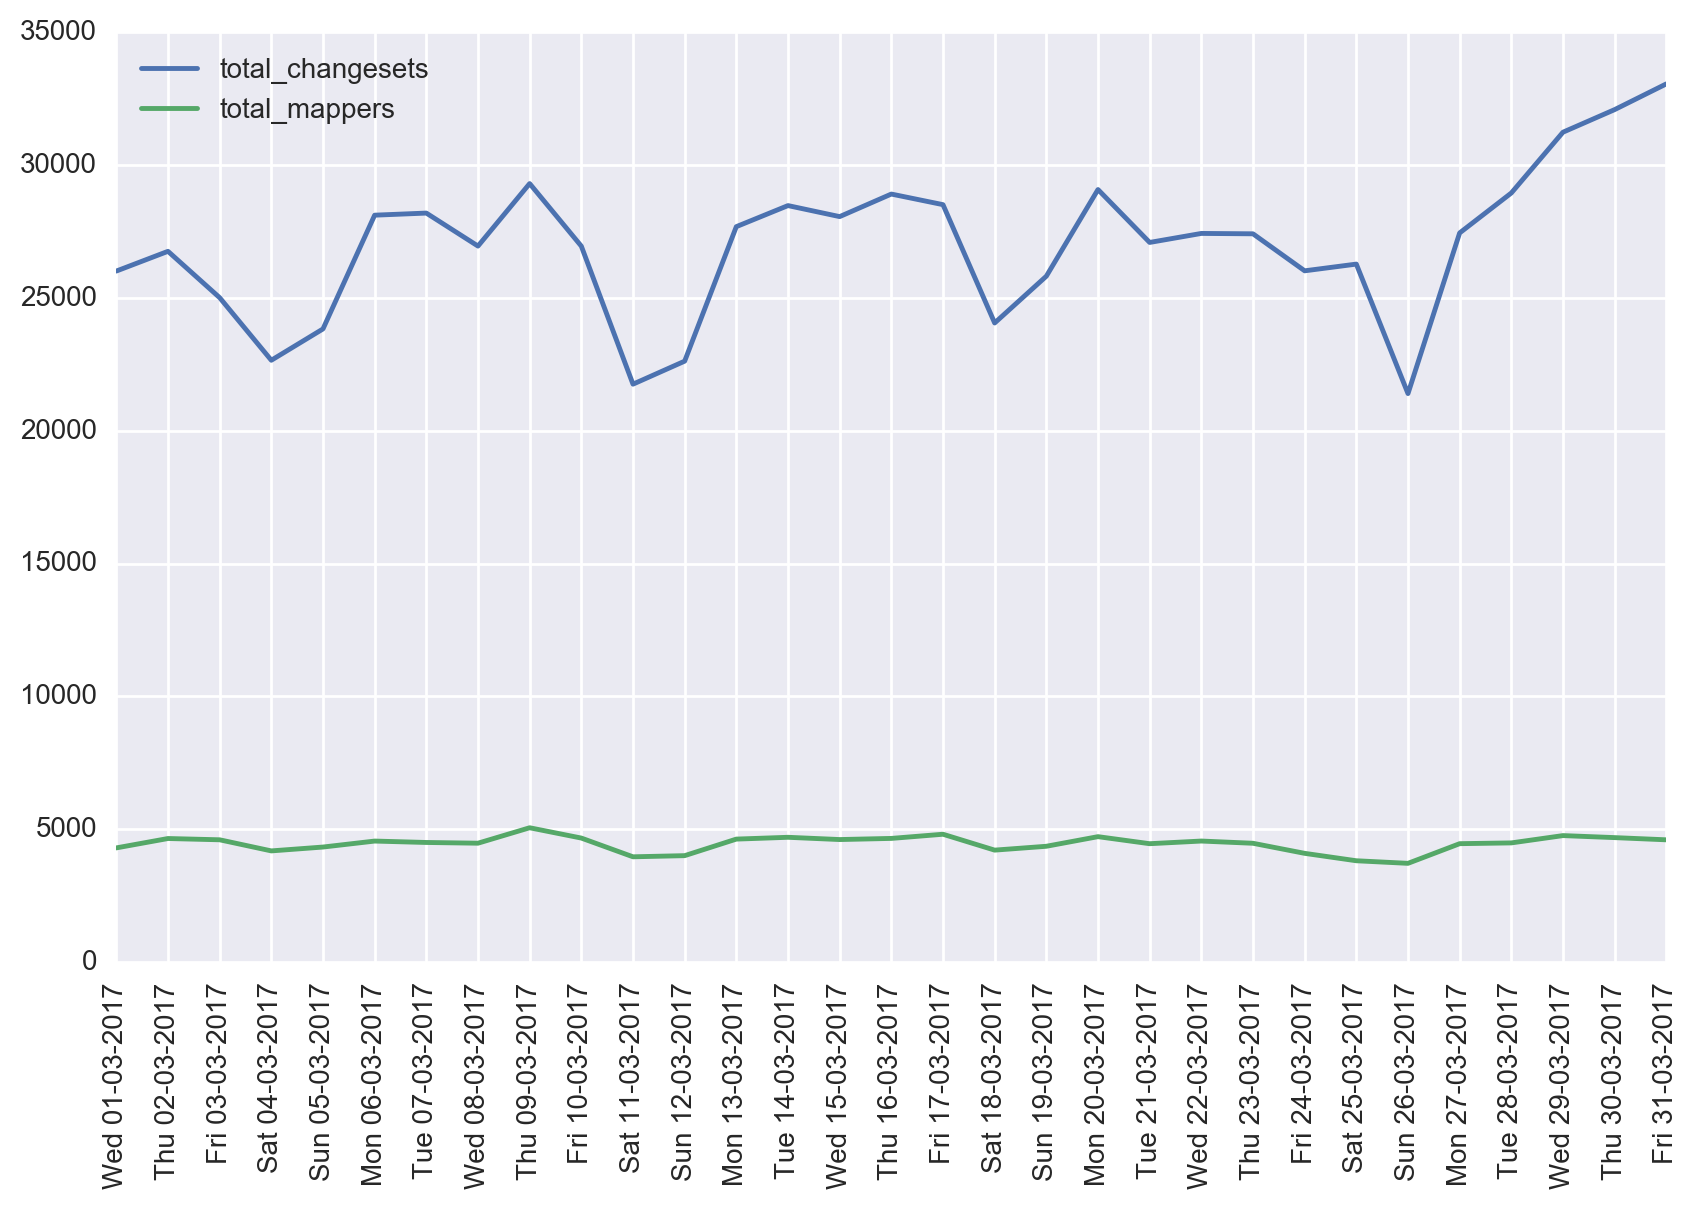

In [9]:
ax = numbers[['total_changesets', 'total_mappers']].plot(figsize=(10, 6))
ax.set_xticks(np.arange(numbers['date'].size))
ax.set_xticklabels(numbers['date'].dt.strftime('%a %d-%m-%Y'), rotation=90);